<a href="https://colab.research.google.com/github/Shreya693/Shreya693/blob/main/Perceptrons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
from sklearn import datasets # has ready-to-use practice datasets, just like MNIST but much smaller and simpler, designed for learning machine-learning basics.

In [2]:
n_pts = 100
centers = [[-0.5,0.5], [0.5,-0.5]]
X,y = datasets.make_blobs(n_samples = n_pts, random_state = 123, centers = centers, cluster_std = 0.4)

'''
make_blobs() is a function in scikit-learn that creates fake (synthetic) cluster data.

1.seed() is for NumPy
2.random_state= is for scikit-learn
(both make randomness repeatable.
If you run code twice, you get the same output.)
'''

#print(X) # X is the 100 data points
#print(y) # y is the labels (i.e. 2 clusters)

x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(100,1))


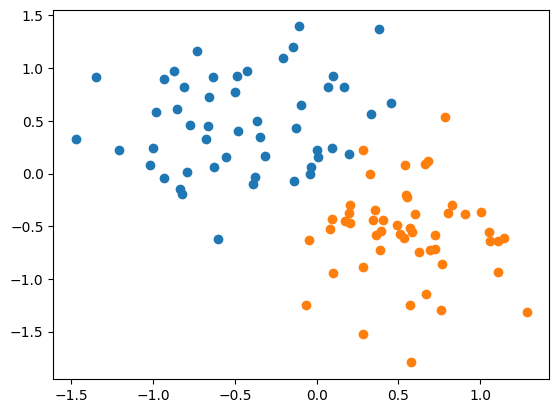

In [3]:
def scatter_plot():
  plt.scatter(X[y == 0, 0], X[y == 0, 1])
  plt.scatter(X[y == 1, 0], X[y == 1, 1])
scatter_plot()

In [4]:
# Model Initializer
class Model(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)

  def forward(self, x):
    pred = torch.sigmoid(self.linear(x))
    return pred

In [5]:
torch.manual_seed(2)
model = Model(2,1) # creates a linear layer with 2 inputs(input size) and 1 output.
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True), Parameter containing:
tensor([0.1939], requires_grad=True)]


In [6]:
# tuple unpacking
[w,b] = model.parameters()
w1,w2 = w.view(2)
b1 = b[0]
def get_params():
  return(w1.item(), w2.item(), b1.item())

In [7]:
def plot_fit(title):
  plt.title = title

  w1, w2, b1 = get_params()
  x1 = np.array([-2.0,2.0])

  # 0 = w1x1 + w2x2 + b

  x2 = (w1 * x1 + b1) / -w2

  plt.plot(x1, x2, 'r')
  scatter_plot()

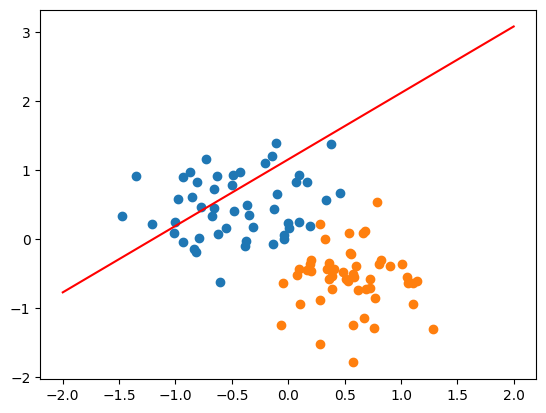

In [8]:
plot_fit('Initial Model')

In [9]:
# Model training
# What is Cross Entropy

criterion = nn.BCELoss() # BCEloss() functn is apt for binary classification
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [14]:
epochs = 1000
losses = []

for i in range(epochs):
  y_pred = model.forward(x_data)
  loss = criterion(y_pred, y_data)
  print("epoch:", i, "loss:", loss.item())
  losses.append(loss.item())
  optimizer.zero_grad() # Zero out old gradients
  loss.backward() # Computes gradients -> Figures out how each weight contributed to the mistake.
  optimizer.step() # Updates weights(this is where learning happens)

epoch: 0 loss: 0.25603339076042175
epoch: 1 loss: 0.25591474771499634
epoch: 2 loss: 0.25579628348350525
epoch: 3 loss: 0.2556779384613037
epoch: 4 loss: 0.2555598020553589
epoch: 5 loss: 0.255441814661026
epoch: 6 loss: 0.25532397627830505
epoch: 7 loss: 0.25520628690719604
epoch: 8 loss: 0.25508877635002136
epoch: 9 loss: 0.25497138500213623
epoch: 10 loss: 0.25485414266586304
epoch: 11 loss: 0.25473707914352417
epoch: 12 loss: 0.25462019443511963
epoch: 13 loss: 0.25450342893600464
epoch: 14 loss: 0.2543868124485016
epoch: 15 loss: 0.25427037477493286
epoch: 16 loss: 0.2541540861129761
epoch: 17 loss: 0.2540379464626312
epoch: 18 loss: 0.2539219558238983
epoch: 19 loss: 0.25380608439445496
epoch: 20 loss: 0.2536904215812683
epoch: 21 loss: 0.2535748779773712
epoch: 22 loss: 0.25345945358276367
epoch: 23 loss: 0.25334423780441284
epoch: 24 loss: 0.25322917103767395
epoch: 25 loss: 0.2531141936779022
epoch: 26 loss: 0.2529994547367096
epoch: 27 loss: 0.2528848350048065
epoch: 28 loss:

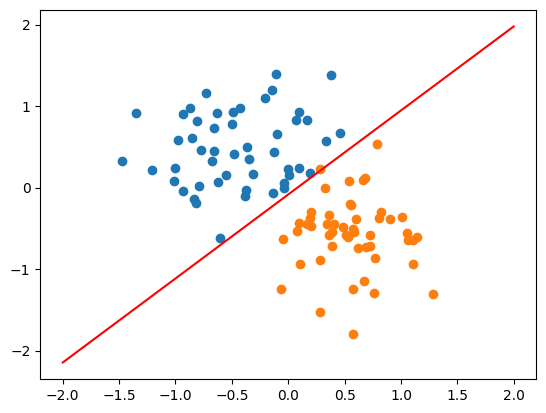

In [16]:
plot_fit("Trained Model")

Text(0.5, 0, 'epoch')

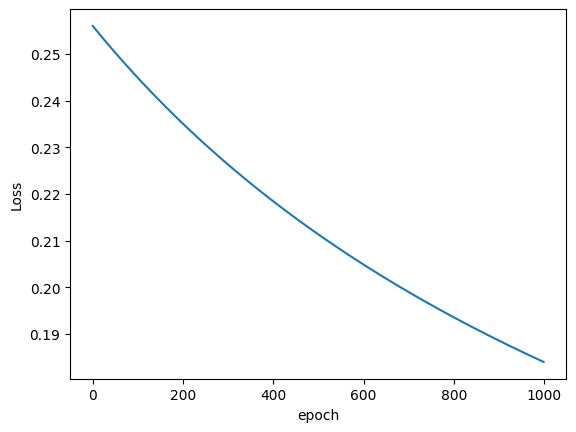

In [17]:
plt.plot(range(epochs),losses)
plt.ylabel('Loss')
plt.xlabel('epoch')


Red point positive probability = 0.979621171951294
Black point positive probability = 0.01458801981061697


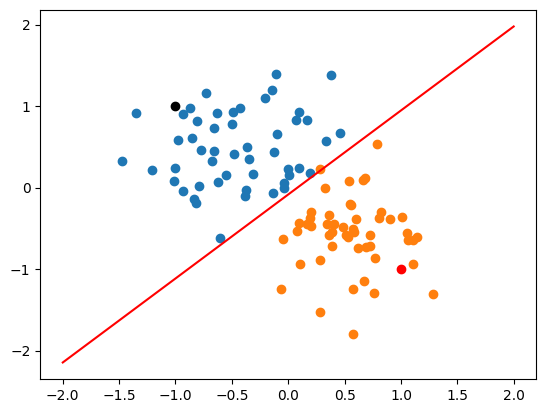

In [19]:
# Model Testing
point1 = torch.Tensor([1.0,-1.0])
point2 = torch.Tensor([-1.0,1.0])
plt.plot(point1.numpy()[0], point1.numpy()[1], 'ro')
plt.plot(point2.numpy()[0], point2.numpy()[1], 'ko')
print("Red point positive probability = {}".format(model.forward(point1).item()))
print("Black point positive probability = {}".format(model.forward(point2).item()))
plot_fit("Trained Model")